In [1]:
import os, sys
import xarray as xr
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches

sys.path.append('../modules')
from ar_scale import calc_ar_scale

In [2]:
## select case study
casename = 'haines' # 'wrangell' or 'haines'

if casename == 'wrangell':
    lat = 56.5
    lon = -132.5
    sdate='2023-11-17'
    edate='2023-11-22'
    
elif casename == 'haines':
    lat = 59.0
    lon = -135.5
    sdate='2020-11-27'
    edate='2020-12-05'

fname = '../out/IVT_ERA5_{0}N_{1}W.csv'.format(lat, lon*-1)
df = pd.read_csv(fname)
df = df.set_index(pd.to_datetime(df.time))
df = df.drop(['time'], axis=1)
df

,lat,lon,IVT
time,,,
2000-01-01 00:00:00,59.0,-135.5,15.808814
2000-01-01 01:00:00,59.0,-135.5,15.684779
2000-01-01 02:00:00,59.0,-135.5,15.177232
2000-01-01 03:00:00,59.0,-135.5,14.247456
2000-01-01 04:00:00,59.0,-135.5,12.811141
...,...,...,...
2023-12-31 19:00:00,59.0,-135.5,33.336114
2023-12-31 20:00:00,59.0,-135.5,32.627750
2023-12-31 21:00:00,59.0,-135.5,32.562283


In [3]:
df = df.reset_index()
df = df.rename(columns={"time": "date"})
ar_scale = calc_ar_scale(df)

## add month from start_date column
ar_scale = ar_scale.set_index(pd.to_datetime(ar_scale.start_date))
## add water year to data as coordinate
water_year = (ar_scale.index.month >= 10) + ar_scale.index.year
month = ar_scale.index.month
ar_scale['water_year'] = water_year
ar_scale['month'] = month

tmp = ar_scale.drop(['start_date', 'end_date', 'duration', 'max_IVT', 'month'], axis=1)
tmp = tmp.reset_index()
tmp = tmp.drop(['start_date'], axis=1)
tmp

,AR_scale,water_year
0,1.0,2001
1,2.0,2001
2,1.0,2002
3,3.0,2002
4,1.0,2003
...,...,...
111,1.0,2023
112,1.0,2023
113,1.0,2023
114,2.0,2024


In [4]:
df.describe(percentiles=[.25, .5, .75, .95])

,date,lat,lon,IVT,prelim_rank,AR,duration
count,210384,210384.0,210384.0,210384.000000,210384.000000,210384.000000,210384.000000
mean,2011-12-31 23:30:00,59.0,-135.5,80.489980,0.040702,0.038710,0.469047
min,2000-01-01 00:00:00,59.0,-135.5,0.041244,0.000000,0.000000,0.000000
25%,2005-12-31 11:45:00,59.0,-135.5,28.932236,0.000000,0.000000,0.000000
50%,2011-12-31 23:30:00,59.0,-135.5,57.662071,0.000000,0.000000,0.000000
75%,2017-12-31 11:15:00,59.0,-135.5,106.493254,0.000000,0.000000,0.000000
95%,2022-10-19 15:51:00,59.0,-135.5,229.679250,0.000000,0.000000,0.000000
max,2023-12-31 23:00:00,59.0,-135.5,786.485907,3.000000,1.000000,80.000000
std,NaN,0.0,0.0,75.696367,0.207502,0.192904,3.268055


In [5]:
perc = [0.5, 0.75, 0.95]
perc_lbl = ['50%', '75%', '95%']
sublist = []
df['IVT'].describe(percentiles=[.95]).loc[['95%']].values
for j, (thres, lbl) in enumerate(zip(perc, perc_lbl)):
        sublist.append(df['IVT'].describe(percentiles=[thres]).loc[[lbl]].values.tolist())

sublist

[[57.662071329694], [106.49325384569711], [229.67925003079495]]

In [6]:
for i, sub in enumerate(sublist):
    print(sub[0])

57.662071329694
106.49325384569711
229.67925003079495


In [7]:

df = df.set_index(pd.to_datetime(df.date))
idx = (df.index >= sdate) & (df.index <= edate)
case = df.loc[idx]
case = case.drop('date', axis=1)
case

,lat,lon,IVT,prelim_rank,AR,duration
date,,,,,,
2020-11-27 00:00:00,59.0,-135.5,44.803837,0,0,0.0
2020-11-27 01:00:00,59.0,-135.5,48.235082,0,0,0.0
2020-11-27 02:00:00,59.0,-135.5,46.860642,0,0,0.0
2020-11-27 03:00:00,59.0,-135.5,45.855399,0,0,0.0
2020-11-27 04:00:00,59.0,-135.5,42.403127,0,0,0.0
...,...,...,...,...,...,...
2020-12-04 20:00:00,59.0,-135.5,189.695112,0,0,0.0
2020-12-04 21:00:00,59.0,-135.5,195.893712,0,0,0.0
2020-12-04 22:00:00,59.0,-135.5,181.768193,0,0,0.0


In [8]:
### Get x-tick and x-labels for both cases
x1 = case.index.values

x_lst = [x1]
xlbl_lst = []
xtick_lst = []
for i, x in enumerate(x_lst):
    x_lbl = []
    xtick_lst.append(x)
    for j in range(len(x)):
        t = pd.to_datetime(str(x[j]))
        x_lbl.append(t.strftime('%m-%d-%Y'))
    xlbl_lst.append(x_lbl)

In [9]:
case = case.reset_index()
# case = case.rename(columns={"time": "date"})
case_arscale = calc_ar_scale(case)
case_arscale

,start_date,end_date,duration,max_IVT,AR_scale
1,2020-12-01 06:00:00,2020-12-03 05:00:00,47.0,522.499995,2


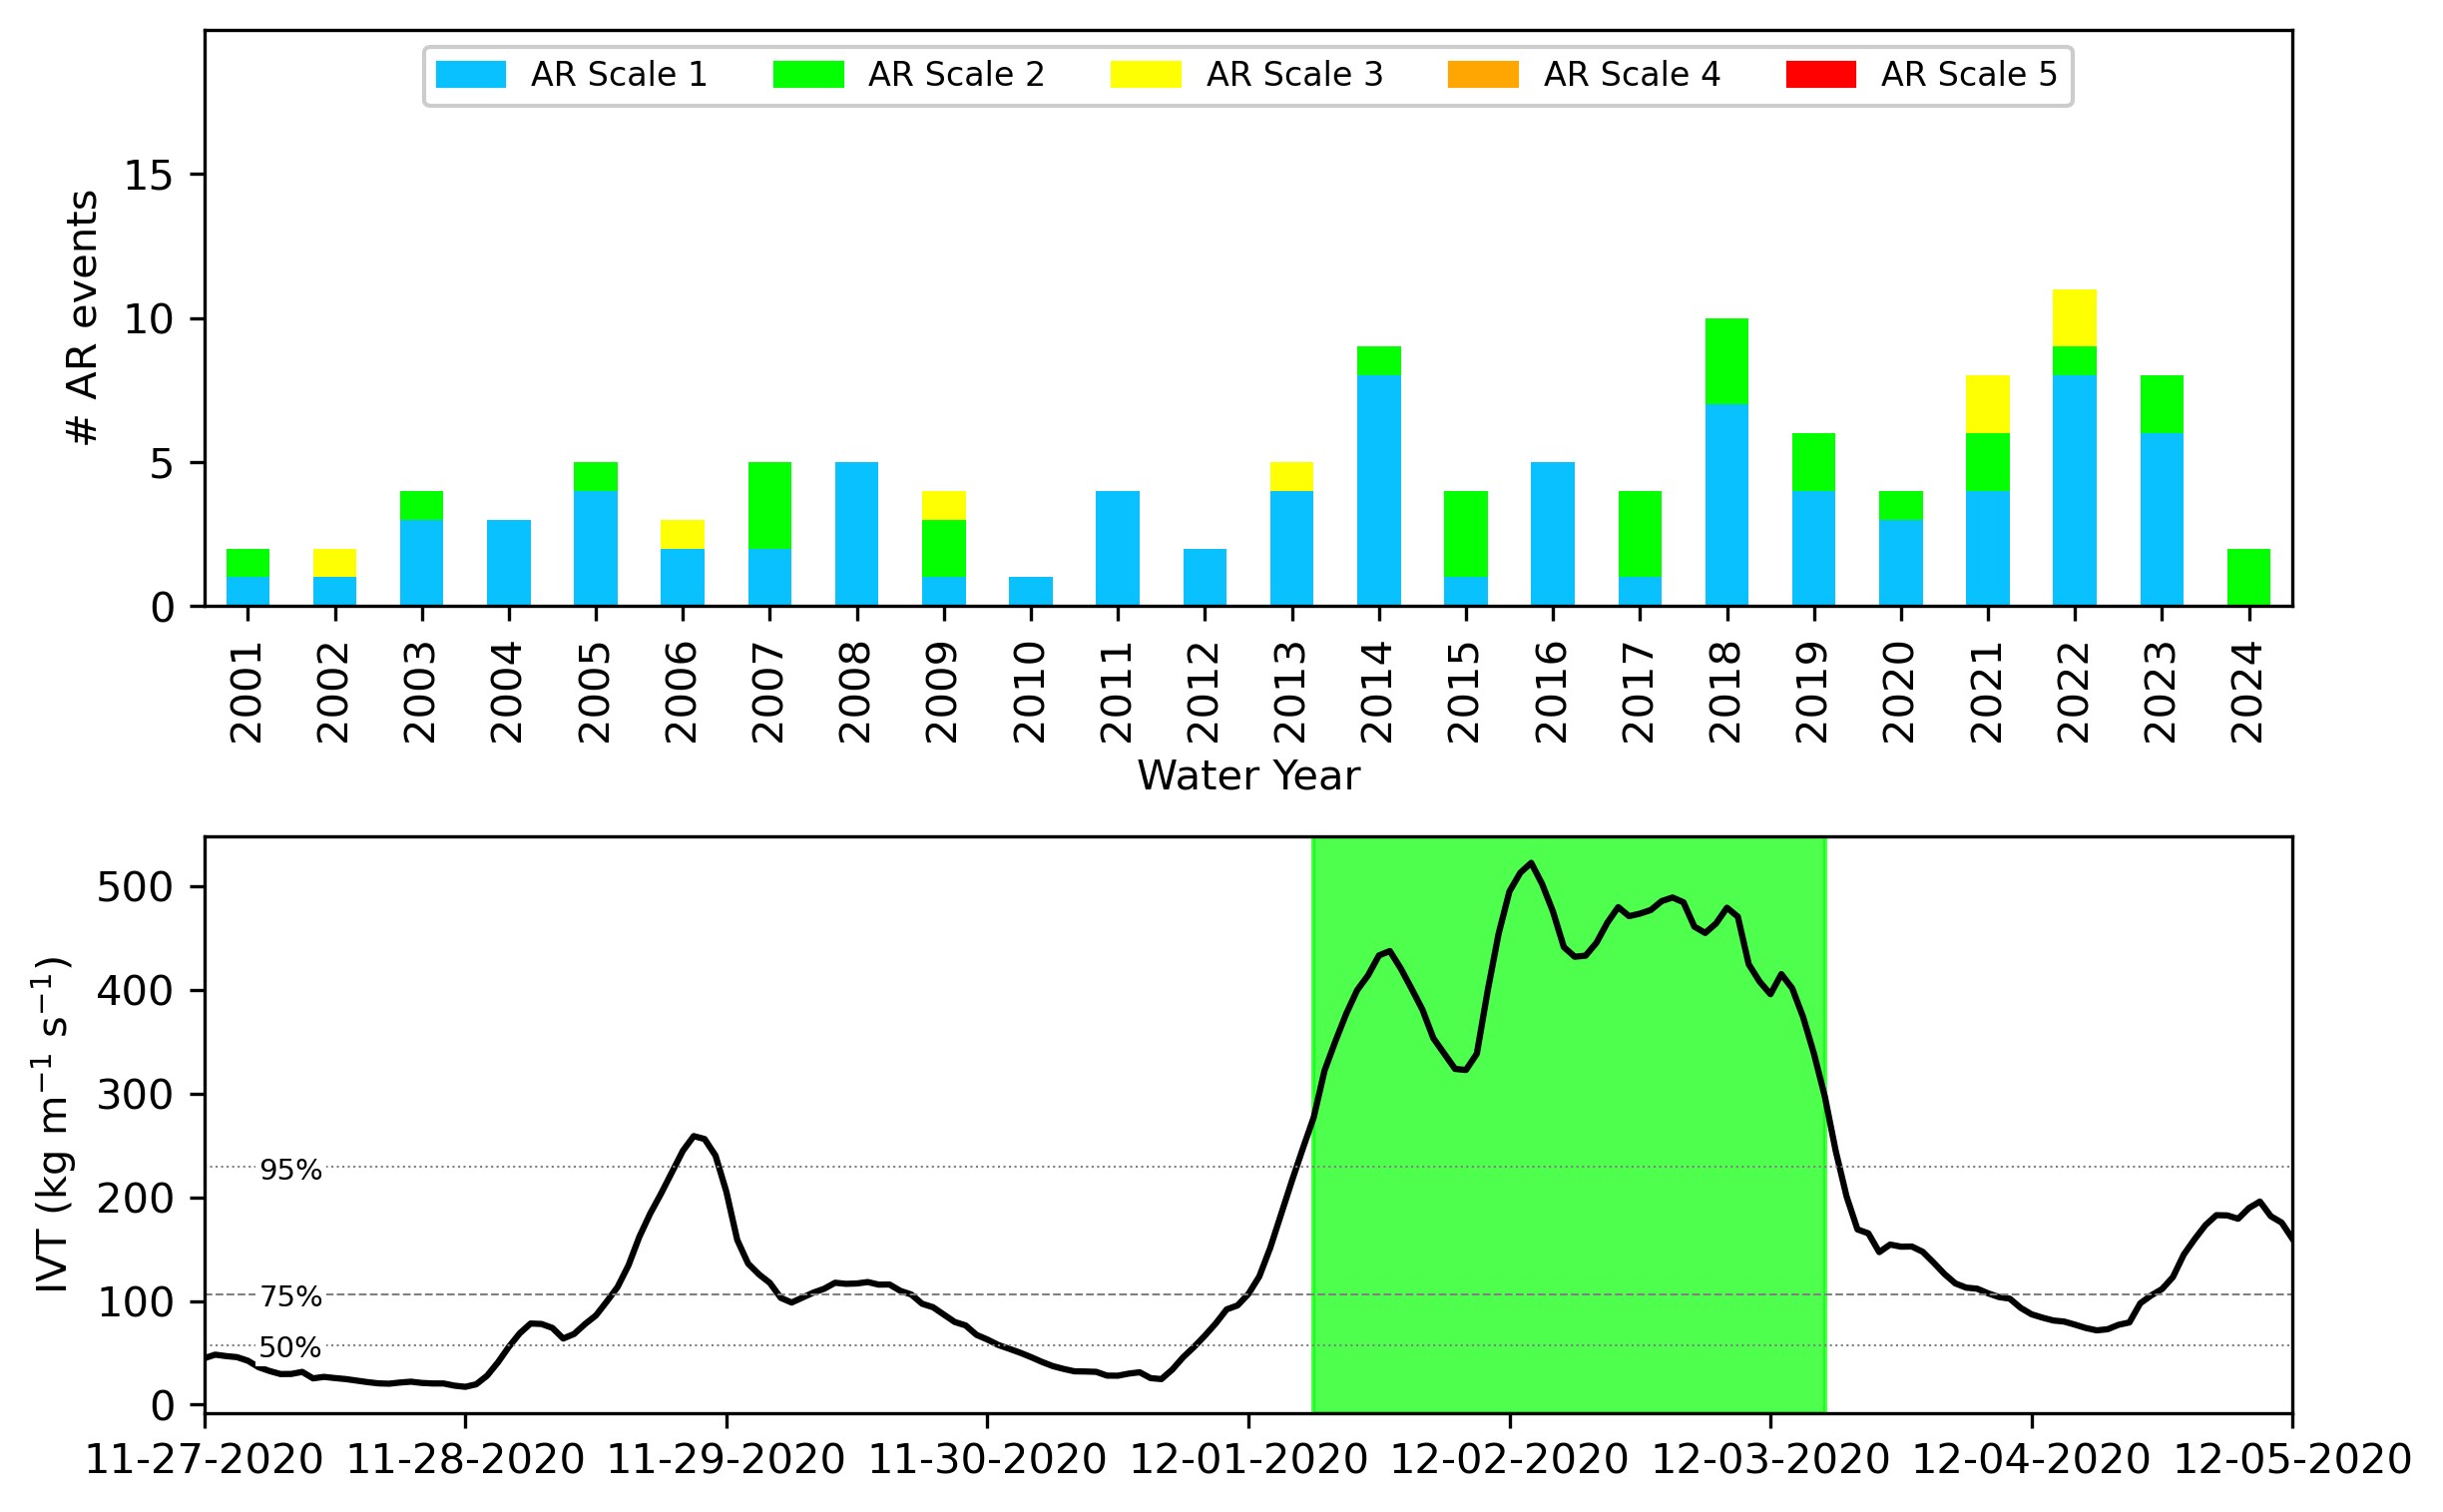

In [10]:
fname = '../figs/ar_tseries_{0}'.format(casename)
fmt = 'png'
fig = plt.figure()
fig.set_size_inches((9.0,6.0))
fig.dpi = 300

nrows = 2
ncols = 1

# contour labels
kw_clabels = {'fontsize': 7, 'inline': True, 'inline_spacing': 7, 'fmt': '%i',
              'rightside_up': True, 'use_clabeltext': True}

kw_ticklabels = {'size': 10, 'color': 'dimgray', 'weight': 'light'}

## Use gridspec to set up a plot with a series of subplots that is
## n-rows by n-columns
gs = GridSpec(nrows, ncols, height_ratios=[1, 1], width_ratios = [1], wspace=0.001, hspace=0.4)
## use gs[rows index, columns index] to access grids

#####################################
### HISTORICAL AR SCALE FREQUENCY ###
#####################################

ax = fig.add_subplot(gs[0, 0])
colors = ['#0ac1ff', '#04ff03', '#ffff03', '#ffa602', '#ff0100']
g = tmp.groupby(['water_year', 'AR_scale']).size().unstack().plot(kind='bar', stacked=True, legend=False,
                                                              color=colors, ax=ax)

ax.set_yticks(np.arange(0, 20, 5))
ax.set_ylim(0, 20)
plt.xlabel("Water Year")
plt.ylabel("# AR events")

# # plt.setp(g.axes.get_xticklabels(), visible=False)
# plt.setp(g.axes.get_xticklabels()[::2], visible=True)

# create legend (of the 3 classes)
patch0 = mpatches.Patch(color=colors[0], label='AR Scale 1')
patch1 = mpatches.Patch(color=colors[1], label='AR Scale 2')
patch2 = mpatches.Patch(color=colors[2], label='AR Scale 3')
patch3 = mpatches.Patch(color=colors[3], label='AR Scale 4')
patch4 = mpatches.Patch(color=colors[4], label='AR Scale 5')
ax.legend(handles=[patch0, patch1, patch2, patch3, patch4], loc='upper center', framealpha=1.0, ncol=5, fontsize=8).set_zorder(200)

#########################
### EVENT TIME SERIES ###
#########################

ax = fig.add_subplot(gs[1, 0])
ax.plot(x1, case.IVT.values, color='k')
ax.set_ylabel('IVT (kg m$^{-1}$ s$^{-1}$)', fontsize=10.)
ax.set_xlim(x1.min(), x1[-24])

## x-axis format dates/ticks
x_ticks = xtick_lst[0]
x_labels = xlbl_lst[0]
ax.set_xticks(x_ticks[::24]) # set the labels every x hours
ax.set_xticklabels(x_labels[::24], fontsize=10)

# highlight a time range
for index, row in case_arscale.iterrows():
    if row['AR_scale'] == 1:
        c = (10./255.0, 193./255.0, 255./255.0) #10, 193, 255
    elif row['AR_scale'] == 2:
        c = (4./255.0, 255./255.0, 3./255.0) #4, 255, 3
    elif row['AR_scale'] == 3:
        c = (255./255.0, 255./255.0, 3./255.0) #255, 255, 3
    elif row['AR_scale'] == 4:
        c = (255./255.0, 166./255.0, 2./255.0) #255, 166, 2
    elif row['AR_scale'] == 5:
        c = (255./255.0, 1./255.0, 0./255.0) #255, 1, 0
        

    ax.axvspan(row['start_date'], row['end_date'], color=c, alpha=0.7)


## add percentile thresholds
style = {'size': 7, 'color': 'black', 'fontweight': 'normal'}
lstyle_lst = ['dotted', 'dashed', 'dotted']
for i, sub in enumerate(sublist):
    ax.axhline(y=sub[0], color='grey', lw=0.5, linestyle=lstyle_lst[i])

    ax.annotate(perc_lbl[i], xy=(x1[5], sub[0]), xycoords='data',
                    textcoords="offset points", # how to position the text
                    xytext=(0,-3), # distance from text to points (x,y)
                    bbox=dict(boxstyle="square,pad=0.1", fc="white", ec=None, lw=0.0),
                    **style)
    
# ## add twin axis for SWE
# ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
# ax2.bar(x1[::24], SWE, color='tab:blue', alpha=0.5, zorder=0)
# ax2.set_ylabel('SWE (inches)', fontsize=10., color='tab:blue')    
    
fig.savefig('%s.%s' % (fname, fmt), bbox_inches='tight', dpi=300)
plt.show()